# Mari bekerja dengan audio

## Import Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import wave

**Penjelasan:**
- `import numpy as np` : Library numpy digunakan untuk melakukan operasi matematika pada array.
- `import matplotlib.pyplot as plt` : Library matplotlib digunakan untuk membuat plot grafik.
- `import os` : Library os digunakan untuk melakukan operasi pada sistem operasi seperti misalnya membaca file.
- `import wave` : Library wave digunakan untuk membaca file audio.

In [2]:
file_path = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')
# Cara lain, namun tidak di rekomendasikan:
# file_path = "/Users/martinmanullang/Developer/if4021-handson/data/harvard.wav"

# Mengecek apakah file ada atau tidak
if not os.path.exists(file_path):
    print(f"File {file_path} not found.")
    exit()

In [3]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    
    # informasi channel
    n_channels = wav_file.getnchannels()

**Penjelasan:**
- `wave.open` : digunakan untuk membuka file audio.
- `r` adalah mode pembacaan file audio. `r` berarti read.
- kita mengkombinasikannya dengan `with` dan `as` agar file audio tertutup secara otomatis setelah selesai digunakan.
- `frames = wav_file.readframes(-1)`
    - `readframes(-1)` : digunakan untuk membaca semua frame audio.
- `np.frombuffer` : digunakan untuk mengubah frame audio menjadi array numpy.
    - `dtype='int16'` : digunakan untuk menentukan tipe data array numpy. Dalam hal ini, audio akan diubah menjadi array dengan tipe data int16. Mengapa 16? Karena audio yang kita gunakan adalah audio 16-bit.
- `wav_file.getframerate()` : digunakan untuk mendapatkan sampling rate dari audio.
- `wav_file.getnchannels()` : digunakan untuk mendapatkan jumlah channel dari audio.




In [4]:
print(f"Isi dari sound_data: {sound_data}")
print(f"Panjang dari sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rate}")
print(f"Jumlah channel: {n_channels}")

Isi dari sound_data: [  0   0   0 ... -58 -61 -60]
Panjang dari sound_data: 1619016
Sampling rate: 44100
Jumlah channel: 2


### Membagi Data Audio Stereo menjadi 2 Data

**Mengapa perlu dilakukan pemotongan?**
- Karena data audio yang ada berupa data stereo (memiliki 2 channel)
- Sehingga, kita harus memisahkan data audio tersebut menjadi 2 channel yang berbeda.

In [5]:
sound_data = sound_data.reshape(-1, n_channels)
print(f"Shape dari `sound_data` setelah di reshape: {sound_data.shape}")

data_audio_kiri = sound_data[:, 0]
data_audio_kanan = sound_data[:, 1]

print(f"Panjang Audio Kiri: {len(data_audio_kiri)}")
print(f"Panjang Audio Kanan: {len(data_audio_kanan)}")

Shape dari `sound_data` setelah di reshape: (809508, 2)
Panjang Audio Kiri: 809508
Panjang Audio Kanan: 809508


Penjelasan `sound_data = sound_data.reshape(-1, n_channels)`:
- `.reshape` digunakan untuk mengubah bentuk array
- `-1` digunakan untuk menentukan jumlah baris yang tidak diketahui. Dalam hal ini, kita tidak mengetahui jumlah baris yang dibutuhkan.

### Mari Memvisualisasi Audio

In [6]:
panjang_audio_sampel = len(data_audio_kiri)
print(f"Panjang Audio Sampel: {panjang_audio_sampel}")

panjang_audio_detik = panjang_audio_sampel / sampling_rate
print(f"Panjang Audio Detik: {panjang_audio_detik}")

# Membuat sumbu waktu
time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)

Panjang Audio Sampel: 809508
Panjang Audio Detik: 18.356190476190477


Memvisualisasikan pada matplotlib

```python
plt.subplots(2, 1, figsize=(18, 5))
```

**Penjelasan:**
- `plt.subplots(2, 1, figsize=(18, 5))` : digunakan untuk membuat 2 plot dalam 1 baris.
    - `2` : jumlah plot yang akan dibuat.
    - `1` : jumlah kolom plot yang akan dibuat.
    - `figsize=(18, 5)` : digunakan untuk menentukan ukuran plot yang akan dibuat.

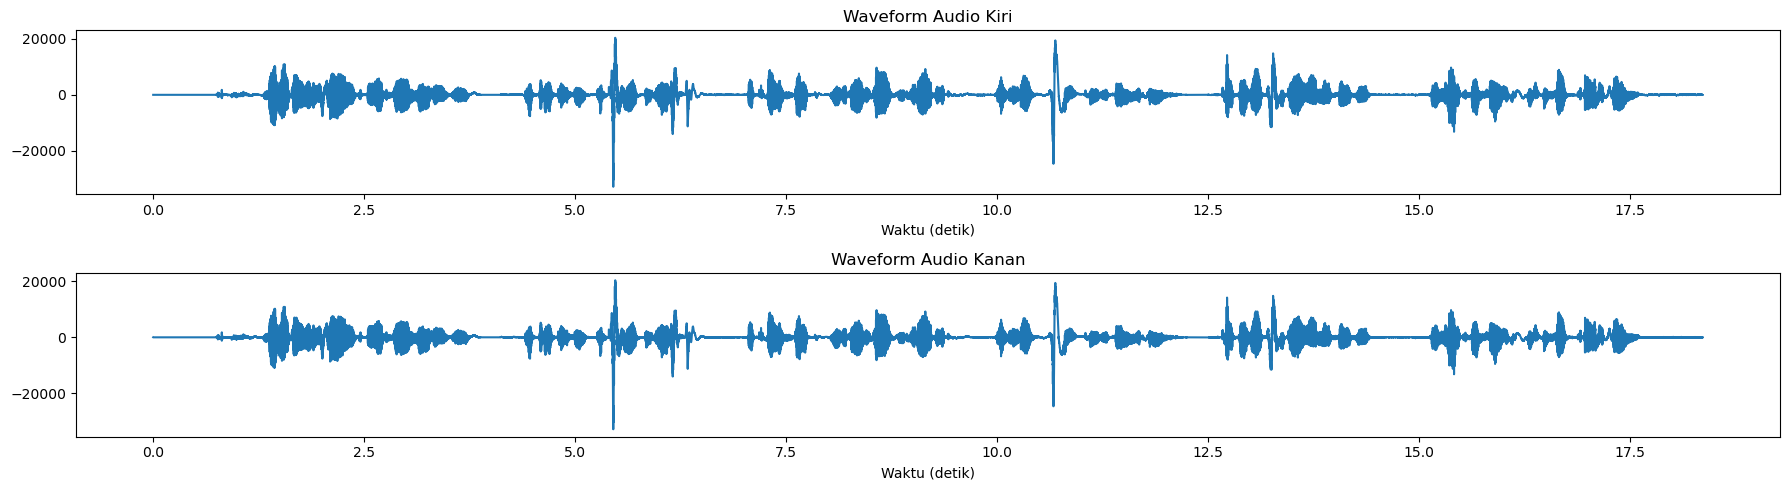

In [7]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis, data_audio_kiri, label='Kiri')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(time_axis, data_audio_kanan, label='Kanan')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Variabel `time_axis` adalah sumbu x yang akan digunakan untuk memvisualisasikan audio. Cara membuat `time_axis` adalah sebagai berikut:
- Tentukan panjang audio dalam detik dengan cara `panjang_audio = len(sound_data) / sampling_rate`.
- Buat array numpy yang berisi nilai waktu mulai dari 0 sampai panjang audio dengan cara `time_axis = np.linspace(0., panjang_audio, len(sound_data))`.


### Mari Membuat Spectogram

In [8]:
import librosa
import librosa.display

- `librosa` untuk memuat file audio
- `librosa.display` untuk menampilkan spectogram

In [9]:
file_path = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')

In [10]:
# cara membaca file audio menggunakan librosa

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

In [11]:
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


**Penjelasan:**
- fungsi `librosa.load(file_path)` digunakan untuk memuat audio. Dan mengembalikan dua buah return, yaitu:
    - `data_audio` : data audio.
    - `sr` : sampling rate dari audio.
- `librosa.stft` : digunakan untuk menghitung Short-Time Fourier Transform (STFT) dari audio.
- `librosa.amplitude_to_db` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
- Sampling rate pada librosa menunjukkan hanya 1 channel saja sehingga berbeda dengan pembacaan `wave` (yaitu, 44100Hz)

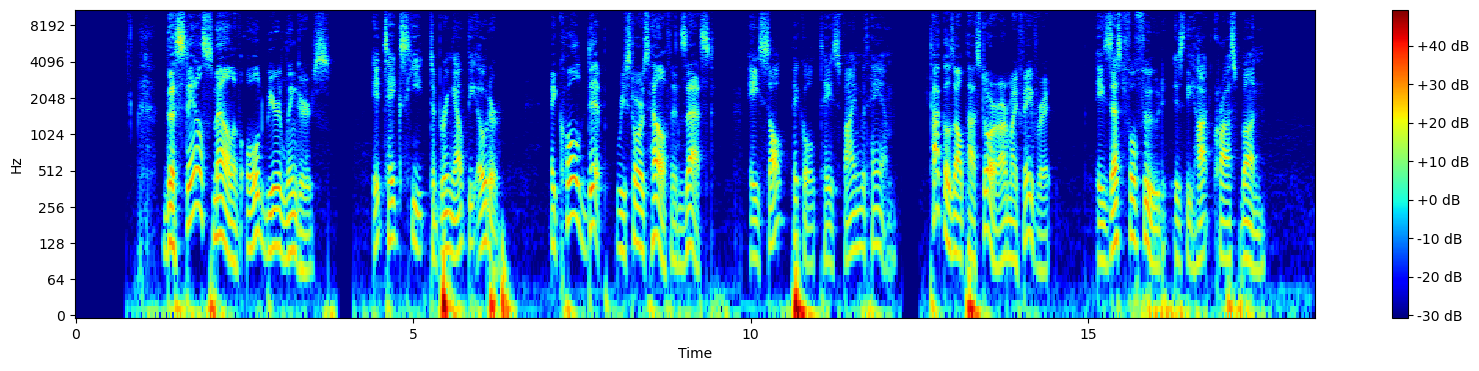

In [12]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

**Penjelasan:**
- `librosa.display.specshow` : digunakan untuk menampilkan spektrogram audio.
    - `librosa.amplitude_to_db(np.abs(S))` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
    - `sr=sr` : digunakan untuk menentukan sampling rate dari audio.
    - `x_axis='time'` : digunakan untuk menampilkan sumbu x (time-axis) dalam satuan waktu.
    - `y_axis='log'` : digunakan untuk menampilkan sumbu y (frequency-axis) dalam skala logaritmik.
- `plt.colorbar(format='%+2.0f dB')` : digunakan untuk menampilkan colorbar pada spektrogram audio.

### Cara lain melakukan visualisasi dan spectogram 

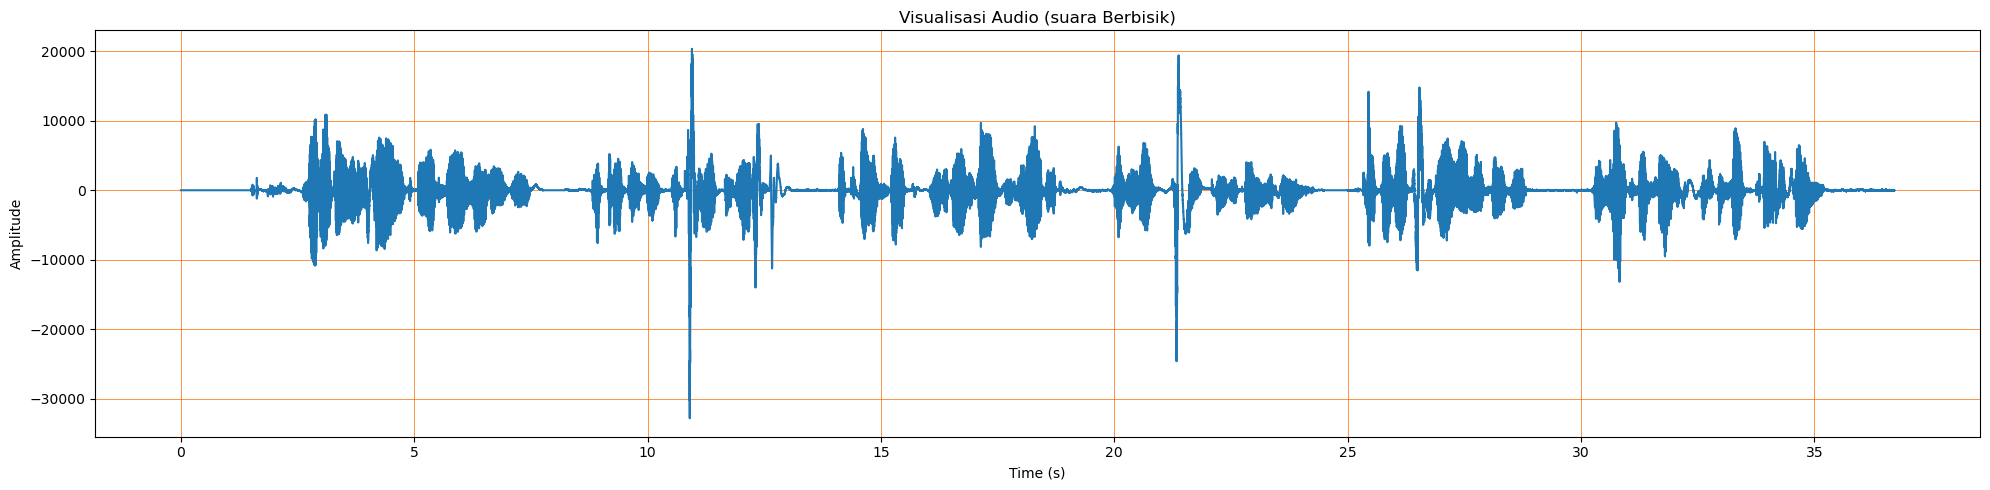

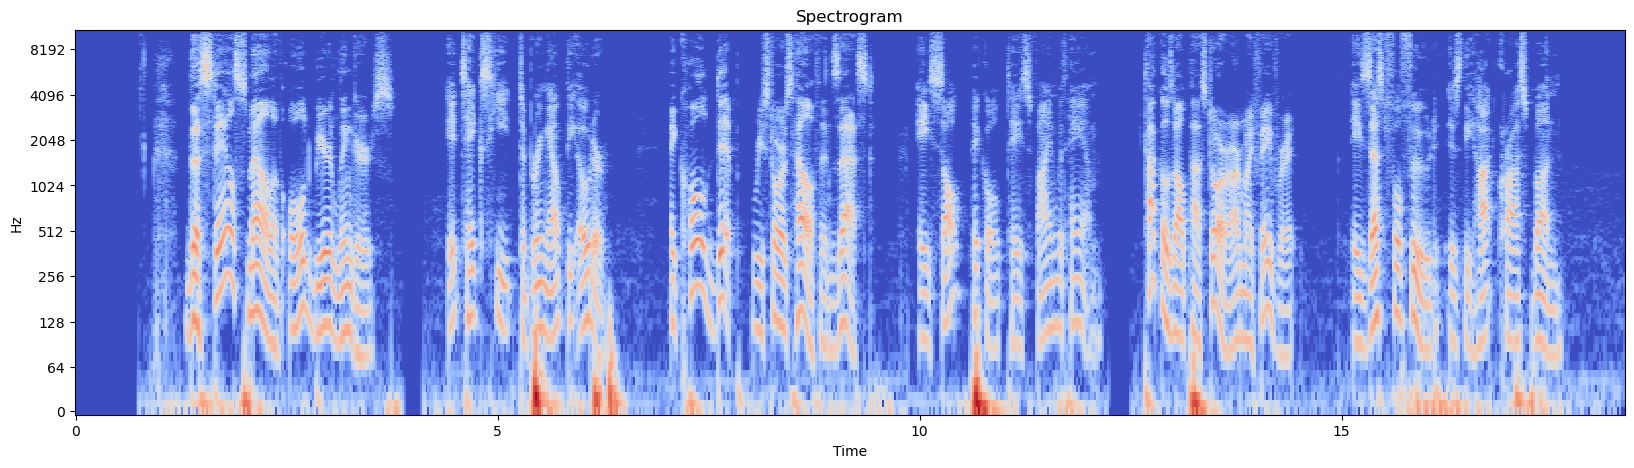

In [15]:
letak_file = os.path.join(os.getcwd(), 'file_suara', 'harvard.wav')
with wave.open(letak_file, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_info = np.frombuffer(frames, dtype=np.int16)
    frame_rate = wav_file.getframerate()
    time = np.linspace(0, len(sound_info) / frame_rate, num=len(sound_info))
    
    plt.figure(figsize=(20, 5))
    plt.plot(time, sound_info)
    plt.title('Visualisasi Audio (suara Berbisik)')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.grid(linewidth=0.5, color = '#FF6600')
    plt.tight_layout()
    plt.show()
    
    y, sr = librosa.load(letak_file)
    plt.figure(figsize=(20, 5))
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(S))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.title('Spectrogram')
    plt.show()

### Mari Belajar Melakukan Fading

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os
import wave
from pydub import AudioSegment
from pydub.playback import play

c:\Users\User\anaconda3\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


`import matplotlib.pyplot as plt`

Digunakan untuk membuat visualisasi data, seperti grafik, diagram, atau spektrum audio.
Dalam konteks audio processing, biasanya digunakan untuk menampilkan waveform, spektrogram, atau hasil analisis audio.

`import numpy as np`

Digunakan untuk manipulasi array dan operasi matematika, seperti pemrosesan sinyal dalam bentuk numerik.
Berguna dalam pengolahan data audio, misalnya untuk konversi format data dan perhitungan fitur.

`import librosa`

Perpustakaan untuk analisis dan pemrosesan audio, khususnya untuk ekstraksi fitur musik.
Contoh penggunaannya adalah membaca file audio, menampilkan spektrogram, atau ekstraksi fitur seperti MFCC (Mel-Frequency Cepstral Coefficients).

`import librosa.display`

Submodul dari librosa yang digunakan untuk menampilkan representasi visual dari data audio.
Biasanya dipakai untuk menggambar waveform, spektrogram, atau mel-spectrogram menggunakan matplotlib.

`import os`

Modul bawaan Python untuk operasi sistem, seperti mengakses file, membuat direktori, atau mengelola path.
Dalam konteks ini, biasanya digunakan untuk mencari, menyimpan, atau memuat file audio.

`import wave`

Modul untuk membaca dan menulis file audio dalam format WAV.
Bisa digunakan untuk mendapatkan informasi seperti jumlah channel, frame rate, atau durasi audio dalam file WAV.

`from pydub import AudioSegment`

Digunakan untuk memproses file audio, termasuk konversi format, pemotongan, atau penggabungan audio.
AudioSegment memungkinkan manipulasi audio dalam berbagai format seperti MP3, WAV, OGG, dll.

`from pydub.playback import play`

Memungkinkan pemutaran audio langsung dari kode Python.
Biasanya digunakan untuk memutar objek AudioSegment tanpa perlu menggunakan aplikasi pemutar audio eksternal.

In [12]:
# Muat file audio dari jalur tertentu
letak_file = os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')
audio = AudioSegment.from_file(letak_file)

# Fungsi untuk menerapkan fading logaritmik
def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
    steps = duration_ms // 10  # Setiap 10 ms langkah
    start_dB = -40.0 if fade_in else 0.0  # Mulai dari -40 dB untuk fade in
    end_dB = 0.0 if fade_in else -40.0  # Akhiri di 0 dB untuk fade in, atau turun ke -40 dB untuk fade out

    faded_audio = AudioSegment.silent(duration=0)  # Mulai dengan audio kosong

    for i in range(steps):
        volume_dB = start_dB + (end_dB - start_dB) * (1 - np.log10(i + 1) / np.log10(steps + 1))
        segment = audio[i * 10:(i + 1) * 10].apply_gain(volume_dB)  # Gunakan apply_gain() untuk perubahan volume
        faded_audio += segment  # Gabungkan setiap segmen audio

    return faded_audio

# Terapkan fade bawaan untuk perbandingan
faded_in_audio_builtin = audio.fade_in(10000)
faded_out_audio_builtin = audio.fade_out(10000)

# Terapkan fade logaritmik
faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=10000)

# Tentukan jalur direktori untuk menyimpan file output
output_dir = os.path.join(os.getcwd(), 'output')
os.makedirs(output_dir, exist_ok=True)

# Simpan hasilnya
faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")

print("File audio dengan efek fade in dan fade out telah disimpan!")

File audio dengan efek fade in dan fade out telah disimpan!


### **Penjelasan Kode**
1. **Membaca file audio**
   ```python
   letak_file = os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')
   audio = AudioSegment.from_file(letak_file)
   ```
   - `os.path.join(os.getcwd(), 'file_suara', 'artorias.wav')` digunakan untuk mendapatkan jalur absolut dari file audio yang disimpan dalam folder `file_suara`.
   - `AudioSegment.from_file(letak_file)` digunakan untuk memuat file audio ke dalam objek `AudioSegment` dari **pydub**.

2. **Fungsi untuk menerapkan fading logaritmik**
   ```python
   def logarithmic_fade(audio, fade_in=True, duration_ms=10000):
   ```
   - Fungsi ini menerapkan **fade in** atau **fade out** dengan perubahan volume yang lebih alami dibandingkan metode linear.
   - **Parameter:**
     - `audio`: File audio yang akan diproses.
     - `fade_in=True`: Menentukan apakah akan diterapkan **fade in** (jika `True`) atau **fade out** (jika `False`).
     - `duration_ms=10000`: Durasi fading dalam milidetik (default 10 detik).
   - **Langkah-langkah utama dalam fungsi:**
     - Membagi fading menjadi beberapa **step** per 10 milidetik (`steps = duration_ms // 10`).
     - Menghitung volume dalam **desibel (dB)** menggunakan rumus **logaritmik** untuk menghasilkan efek yang lebih alami.
     - Menggunakan `apply_gain()` untuk menerapkan perubahan volume setiap 10 ms.
     - Menggabungkan kembali segmen-segmen audio yang telah diproses.

3. **Penerapan efek fading menggunakan metode bawaan**
   ```python
   faded_in_audio_builtin = audio.fade_in(10000)
   faded_out_audio_builtin = audio.fade_out(10000)
   ```
   - `fade_in(10000)`: Menerapkan **fade in** secara linear selama 10 detik menggunakan fungsi bawaan **pydub**.
   - `fade_out(10000)`: Menerapkan **fade out** secara linear selama 10 detik.

4. **Penerapan efek fading menggunakan metode logaritmik**
   ```python
   faded_in_audio_log = logarithmic_fade(audio, fade_in=True, duration_ms=10000)
   faded_out_audio_log = logarithmic_fade(audio, fade_in=False, duration_ms=10000)
   ```
   - `logarithmic_fade(audio, fade_in=True, duration_ms=10000)`: Menerapkan **fade in** dengan pola perubahan volume **logaritmik** selama 10 detik.
   - `logarithmic_fade(audio, fade_in=False, duration_ms=10000)`: Menerapkan **fade out** dengan pola perubahan volume **logaritmik** selama 10 detik.

5. **Menyimpan file hasilnya**
   ```python
   output_dir = os.path.join(os.getcwd(), 'output')
   os.makedirs(output_dir, exist_ok=True)
   ```
   - Membuat direktori `output` jika belum ada.

   ```python
   faded_in_audio_builtin.export(os.path.join(output_dir, 'faded_in_builtin.wav'), format="wav")
   faded_out_audio_builtin.export(os.path.join(output_dir, 'faded_out_builtin.wav'), format="wav")
   faded_in_audio_log.export(os.path.join(output_dir, 'faded_in_logarithmic.wav'), format="wav")
   faded_out_audio_log.export(os.path.join(output_dir, 'faded_out_logarithmic.wav'), format="wav")
   ```
   - Menyimpan hasil audio dengan berbagai efek fading ke dalam file `.wav`.

6. **Menampilkan pesan bahwa proses selesai**
   ```python
   print("File audio dengan efek fade in dan fade out telah disimpan!")
   ```
   - Memberikan konfirmasi bahwa semua file telah diproses dan disimpan.

---